In [107]:
import pandas as pd
df=pd.read_csv('vestiaire.csv')
df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [108]:
# clean dataframe
df = df.loc[:, :'seller_badge']# drop columns from seller_badge to the end
df.drop(['product_description','brand_url','product_id','product_name'], axis=1,inplace=True)
df.dropna(inplace=True)
df_sold=df[df['sold']==True]

# feature selection
df_sold = df_sold.drop(['reserved', 'available', 'in_stock', 'should_be_gone','sold'], axis=1)  # Drop single-value columns
df_sold = df_sold.drop(['seller_earning','brand_id','seller_badge'],axis=1)# drop inrrelavent columns


In [109]:
df_sold.head()

,product_type,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,brand_name,product_material,product_color,price_usd,seller_price
0,Wool mini skirt,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,Miu Miu,Wool,Grey,272.92,223.65
9,Wool suit jacket,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,Dior,Wool,Grey,437.97,358.91
12,Silk maxi dress,La Perla Silk Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",4.0,La Perla,Silk,Black,444.74,370.62
19,Trousers,Gucci Cotton Trousers,Women,Women Clothing,All seasons,Very good condition,4.0,Gucci,Cotton,Beige,145.75,119.44
53,Lingerie set,Agent Provocateur Polyamide Lingerie,Women,Women Clothing,All seasons,Very good condition,0.0,Agent Provocateur,Polyamide,Black,55.37,46.14


In [110]:
for col in df_sold.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_values)}): {unique_values[:10]}")  # Show first 10 unique values
    print("-" * 50)

Column: product_type
Unique Values (10984): ['Wool mini skirt' 'Jacket' 'Wool coat' 'Mini skirt'
 'Vegan leather trousers' 'Mid-length dress' 'Silk trousers'
 'Silk mid-length dress' 'Suit jacket' 'Wool suit jacket']
--------------------------------------------------
Column: product_keywords
Unique Values (124611): ['Miu Miu Wool Skirts' 'Barbara Bui Cotton Jackets'
 'Comme Des Garcons Wool Coats' 'MSGM Polyester Skirts'
 'LVIR Vegan leather Trousers' 'See by Chloé Cotton - elasthane Dresses'
 'Just Cavalli Silk Trousers' 'J.Crew Silk Dresses'
 'Aquascutum Cotton Jackets' 'Dior Wool Jackets']
--------------------------------------------------
Column: product_gender_target
Unique Values (2): ['Women' 'Men']
--------------------------------------------------
Column: product_category
Unique Values (6): ['Women Clothing' 'Men Clothing' 'Men Accessories' 'Women Accessories'
 'Men Shoes' 'Women Shoes']
--------------------------------------------------
Column: product_season
Unique Values (3

### Product preference segmentaion

feature engnieering

In [111]:
# One-hot encode categorical variables with low cardinality
df_encoded = pd.get_dummies(df_sold, columns=[
    'product_gender_target',
    'product_category',
    'product_season',
    'product_condition'
], drop_first=True)  # Drop first column to avoid multicollinearity

# feature engnieering of replace brand names with their average price or like count
df_encoded['brand_encoded'] = df_sold.groupby('brand_name')['price_usd'].transform('mean')
mean_brand = df_encoded['brand_encoded'].mean()  # Mean before standardization
std_brand = df_encoded['brand_encoded'].std()    # Std before standardization

# Frequency representation of product material and color
for col in ['product_material', 'product_color']:
    # Create new columns without modifying the original
    df_encoded[f'{col}_encoded'] = df[col].map(df[col].value_counts(normalize=True))


# numerial features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply StandardScaler to numerical features
scaler_std = StandardScaler()
df_encoded[['price_usd']] = scaler_std.fit_transform(df_encoded[['price_usd']])

# Apply MinMaxScaler to categorical encodings or features with large variance
scaler_minmax = MinMaxScaler()
df_encoded[['brand_encoded', 'product_like_count']] = scaler_minmax.fit_transform(df_encoded[['brand_encoded', 'product_like_count']])

In [112]:
df_encoded.head()

,product_type,product_keywords,product_like_count,brand_name,product_material,product_color,price_usd,seller_price,product_gender_target_Women,product_category_Men Clothing,...,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,brand_encoded,product_material_encoded,product_color_encoded
0,Wool mini skirt,Miu Miu Wool Skirts,0.048159,Miu Miu,Wool,Grey,0.101480,223.65,1,0,...,0,1,0,0,1,0,0,0.021165,0.078277,0.058514
9,Wool suit jacket,Dior Wool Jackets,0.002833,Dior,Wool,Grey,0.591396,358.91,1,0,...,0,1,0,0,0,0,1,0.034379,0.078277,0.058514
12,Silk maxi dress,La Perla Silk Dresses,0.005666,La Perla,Silk,Black,0.611491,370.62,1,0,...,0,0,0,0,0,1,0,0.006988,0.074751,0.267595
19,Trousers,Gucci Cotton Trousers,0.005666,Gucci,Cotton,Beige,-0.275997,119.44,1,0,...,0,0,0,0,0,0,1,0.023216,0.184662,0.054485
53,Lingerie set,Agent Provocateur Polyamide Lingerie,0.000000,Agent Provocateur,Polyamide,Black,-0.544271,46.14,1,0,...,0,0,0,0,0,0,1,0.007433,0.016448,0.267595


In [113]:
df_color_material=df_encoded[['product_color_encoded','product_color','product_material_encoded','product_material']].drop_duplicates()
df_color_material.head()

,product_color_encoded,product_color,product_material_encoded,product_material
0,0.058514,Grey,0.078277,Wool
12,0.267595,Black,0.074751,Silk
19,0.054485,Beige,0.184662,Cotton
53,0.267595,Black,0.016448,Polyamide
91,0.267595,Black,0.184662,Cotton


feature selection

In [114]:
#feature selection
df_selected = df_encoded.drop(['product_type','product_material','product_color','product_keywords','brand_name','price_usd','seller_price','product_gender_target_Women'],axis=1)

In [115]:
df_selected.head()


,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,brand_encoded,product_material_encoded,product_color_encoded
0,0.048159,0,0,0,1,0,1,0,0,1,0,0,0.021165,0.078277,0.058514
9,0.002833,0,0,0,1,0,1,0,0,0,0,1,0.034379,0.078277,0.058514
12,0.005666,0,0,0,1,0,0,0,0,0,1,0,0.006988,0.074751,0.267595
19,0.005666,0,0,0,1,0,0,0,0,0,0,1,0.023216,0.184662,0.054485
53,0.000000,0,0,0,1,0,0,0,0,0,0,1,0.007433,0.016448,0.267595


In [116]:
df_selected.columns

Index(['product_like_count', 'product_category_Men Clothing',
       'product_category_Men Shoes', 'product_category_Women Accessories',
       'product_category_Women Clothing', 'product_category_Women Shoes',
       'product_season_Autumn / Winter', 'product_season_Spring / Summer',
       'product_condition_Good condition', 'product_condition_Never worn',
       'product_condition_Never worn, with tag',
       'product_condition_Very good condition', 'brand_encoded',
       'product_material_encoded', 'product_color_encoded'],
      dtype='object')

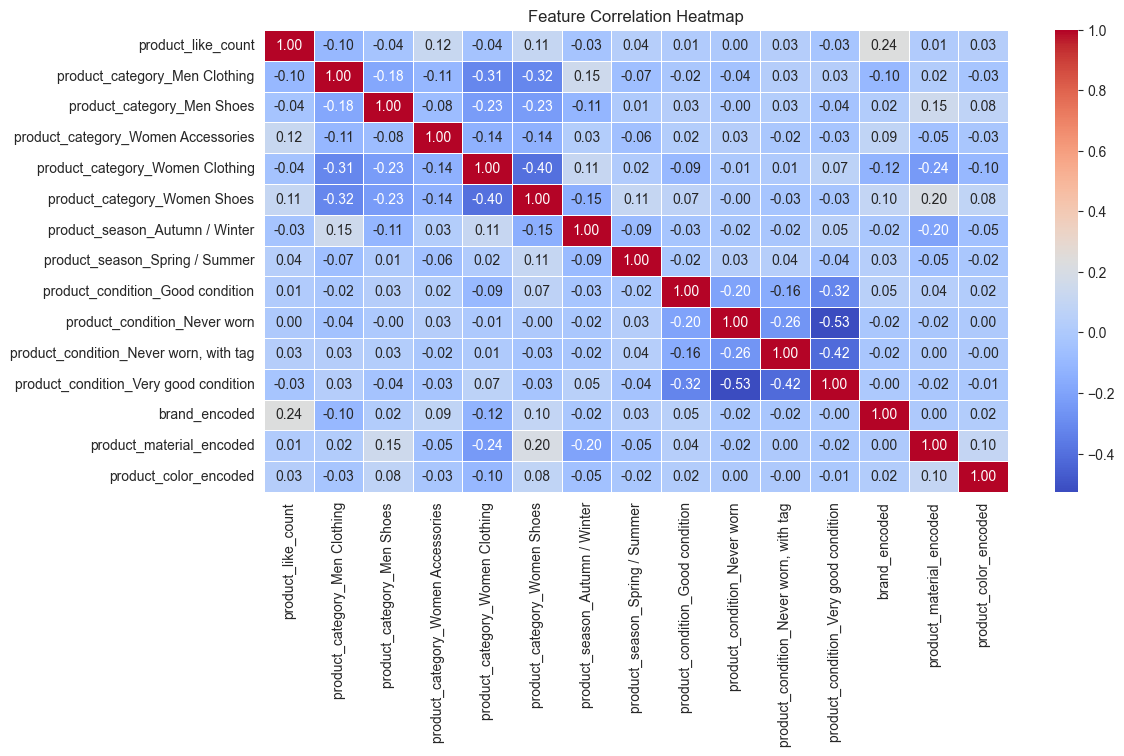

In [117]:
# correlation metrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


PCA Feature Importance:
                                   Feature  Importance
4          product_category_Women Clothing    0.296616
9             product_condition_Never worn    0.289121
10  product_condition_Never worn, with tag    0.279668
5             product_category_Women Shoes    0.277398
11   product_condition_Very good condition    0.244093
1            product_category_Men Clothing    0.236410
8         product_condition_Good condition    0.221508
2               product_category_Men Shoes    0.186271
6           product_season_Autumn / Winter    0.096343
7           product_season_Spring / Summer    0.041403
3       product_category_Women Accessories    0.022571
13                product_material_encoded    0.018408
14                   product_color_encoded    0.008828
0                       product_like_count    0.002539
12                           brand_encoded    0.002089


/var/folders/vh/gllcxg8x3yn4st69ndbdsll00000gn/T/ipykernel_70912/3762521729.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca_importance_df['Importance'], y=pca_importance_df['Feature'], palette="viridis")


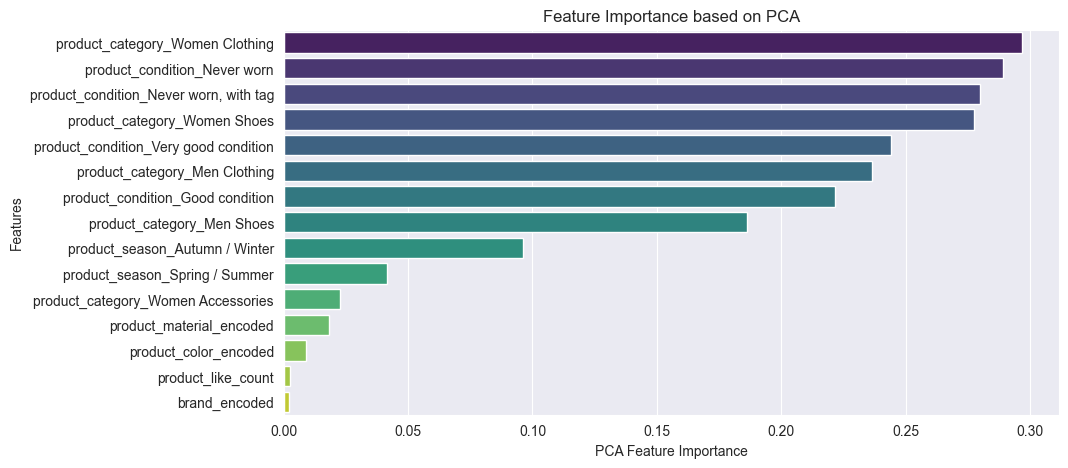

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


# Apply PCA
pca = PCA(n_components=min(6, df_selected.shape[1]))  # Use up to 6 components
pca.fit(df_selected)

# Compute absolute mean importance per feature
feature_importance = np.abs(pca.components_).mean(axis=0)

# Convert to DataFrame
pca_importance_df = pd.DataFrame({'Feature': df_selected.columns, 'Importance': feature_importance})
pca_importance_df = pca_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print("PCA Feature Importance:")
print(pca_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=pca_importance_df['Importance'], y=pca_importance_df['Feature'], palette="viridis")
plt.xlabel("PCA Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance based on PCA")
plt.show()



Clustering - K Means

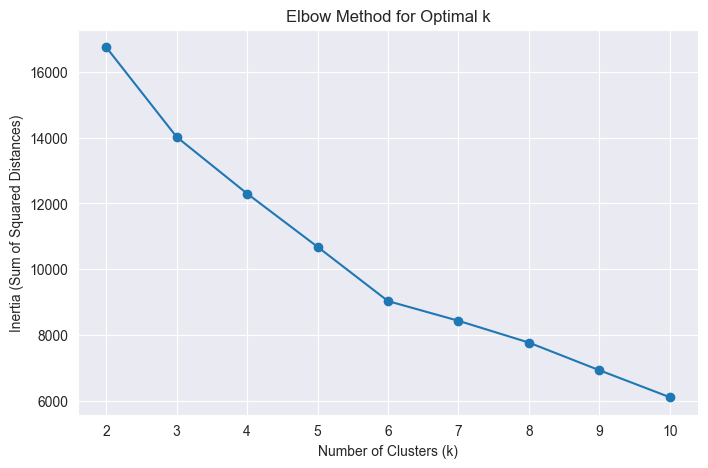

In [119]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of k
inertia = []
K_range = range(2, 11)  # Testing k from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_selected)
    inertia.append(kmeans.inertia_)  # Inertia (Sum of Squared Distances)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [120]:
# Choose optimal k from elbow and silhouette score
optimal_k = 6  # Adjust based on elbow & silhouette score

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(df_selected)

# Check cluster distribution
df_selected['Cluster'].value_counts()


0    3412
3    2642
2    2339
1    2027
4    1789
5    1518
Name: Cluster, dtype: int64

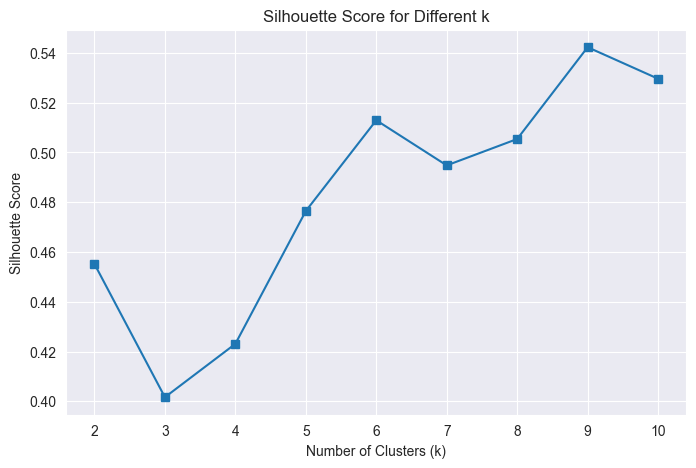

In [121]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_selected)
    silhouette_scores.append(silhouette_score(df_selected, labels))

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.show()



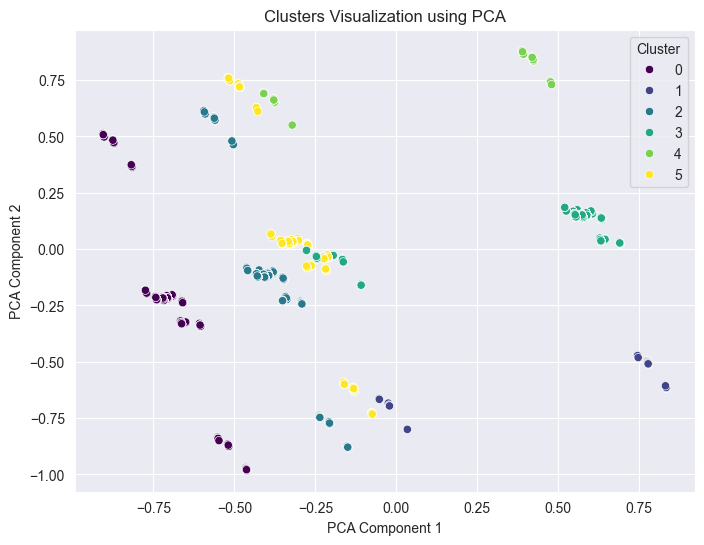

In [122]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_selected['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualization using PCA")
plt.legend(title="Cluster")
plt.show()


Cluster Distribution:
 0    3412
3    2642
2    2339
1    2027
4    1789
5    1518
Name: Cluster, dtype: int64


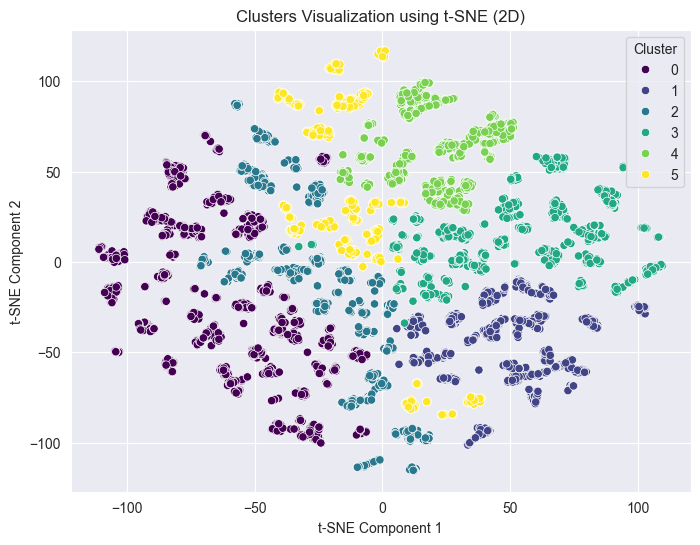

In [123]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Ensure correct cluster assignment
optimal_k = 6  # Set the correct number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(df_selected.drop(columns=['Cluster'], errors='ignore'))

# Check if all clusters have data points
print("Cluster Distribution:\n", df_selected['Cluster'].value_counts())

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne_2d = tsne.fit_transform(df_selected.drop(columns=['Cluster'], errors='ignore'))

# Plot t-SNE visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_tsne_2d[:, 0], y=df_tsne_2d[:, 1], hue=df_selected['Cluster'], palette='viridis')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Clusters Visualization using t-SNE (2D)")
plt.legend(title="Cluster")
plt.show()




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       397
           2       1.00      1.00      1.00       477
           3       1.00      1.00      1.00       520
           4       1.00      1.00      1.00       346
           5       1.00      1.00      1.00       306

    accuracy                           1.00      2746
   macro avg       1.00      1.00      1.00      2746
weighted avg       1.00      1.00      1.00      2746

Accuracy: 1.00


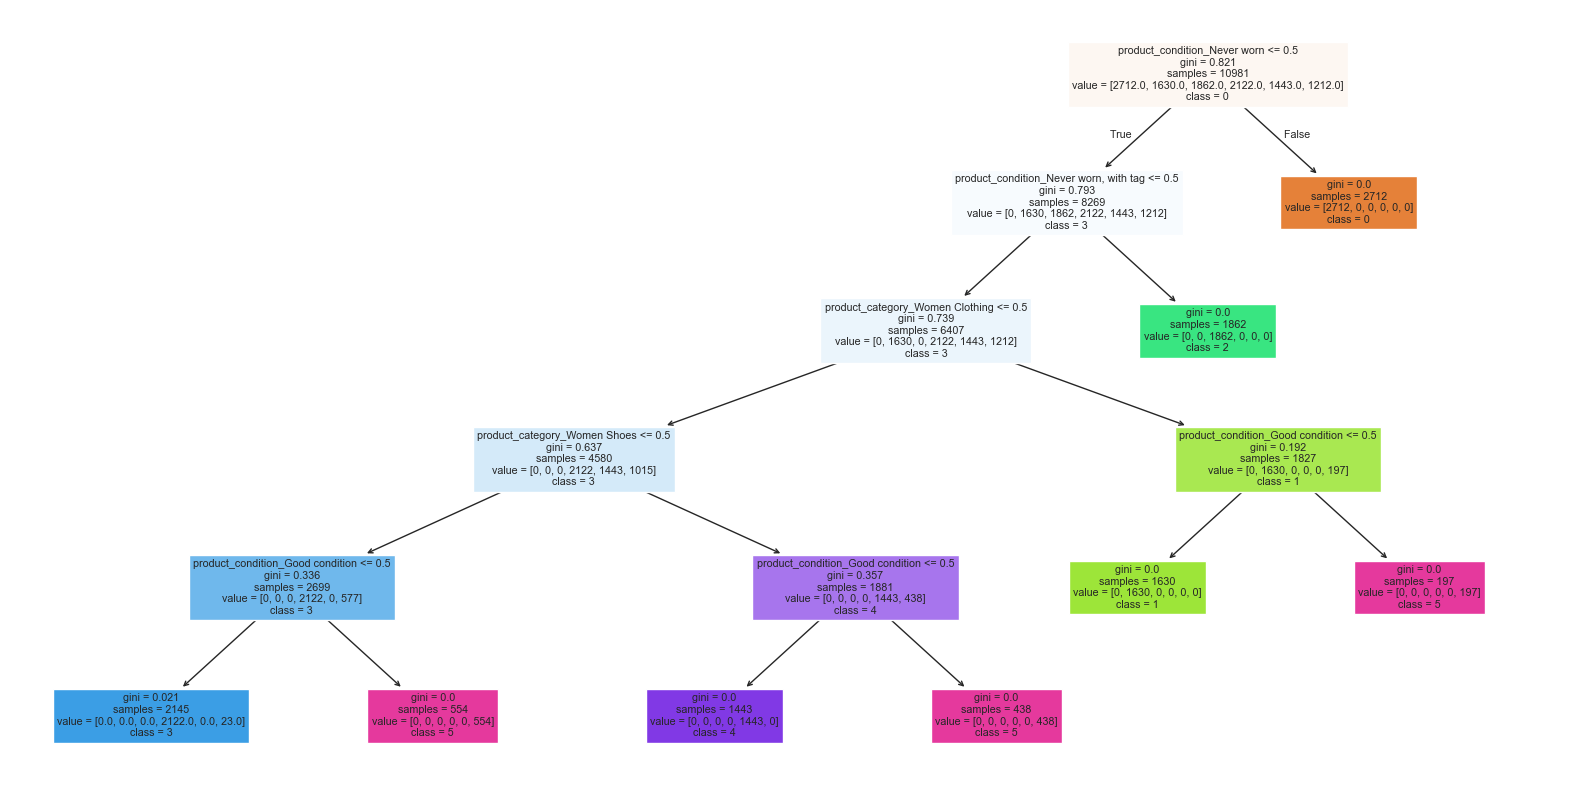

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df_selected.drop(columns=['Cluster'])  # Features used in clustering
y = df_selected['Cluster']  # Cluster labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(i) for i in set(y)], filled=True)
plt.show()


In [125]:
cluster_summary = df_selected.groupby('Cluster').mean()
cluster_summary

,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,brand_encoded,product_material_encoded,product_color_encoded
Cluster,,,,,,,,,,,,,,,
0,0.021363,0.168523,0.116354,0.054220,0.279601,0.286635,0.080305,0.087339,0.00000,1.0,0.0,0.000000,0.017845,0.125374,0.120682
1,0.019025,0.000000,0.000000,0.000000,1.000000,0.000000,0.157375,0.071534,0.00000,0.0,0.0,0.985200,0.014928,0.095239,0.103092
2,0.022908,0.225310,0.137666,0.036340,0.292860,0.260795,0.074391,0.095767,0.00000,0.0,1.0,0.000000,0.017611,0.128606,0.119851
3,0.018289,0.517790,0.258138,0.087434,0.000000,0.000000,0.116957,0.029902,0.00000,0.0,0.0,0.970855,0.019166,0.132028,0.118464
4,0.024757,0.000000,0.000000,0.000000,0.000000,1.000000,0.025713,0.105087,0.00000,0.0,0.0,0.951369,0.021467,0.157963,0.136838
5,0.022156,0.174572,0.144269,0.065876,0.160738,0.372200,0.065217,0.058630,0.98419,0.0,0.0,0.000000,0.021428,0.138026,0.124601


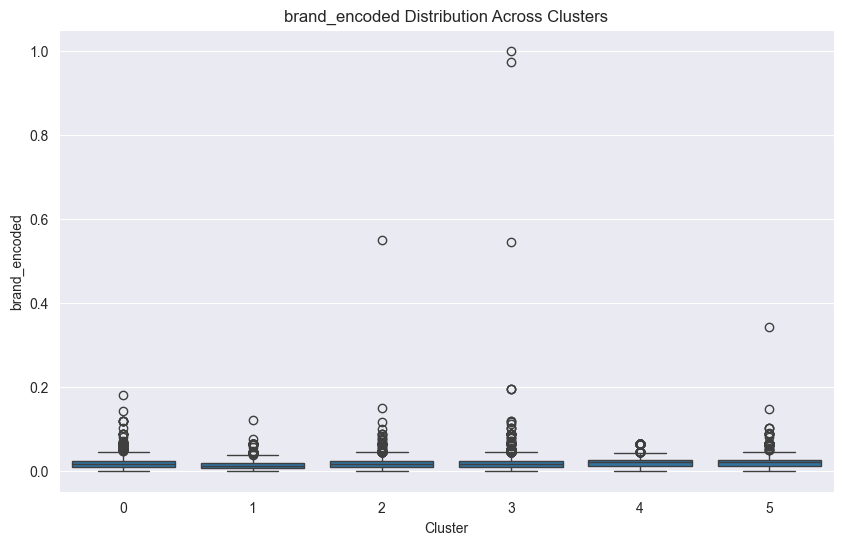

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a feature to visualize across clusters
feature_to_plot = 'brand_encoded'  # Change this to relevant feature

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_selected['Cluster'], y=df_selected[feature_to_plot])
plt.title(f'{feature_to_plot} Distribution Across Clusters')
plt.show()

GMM

GMM Silhouette Score: 0.5125478894587874


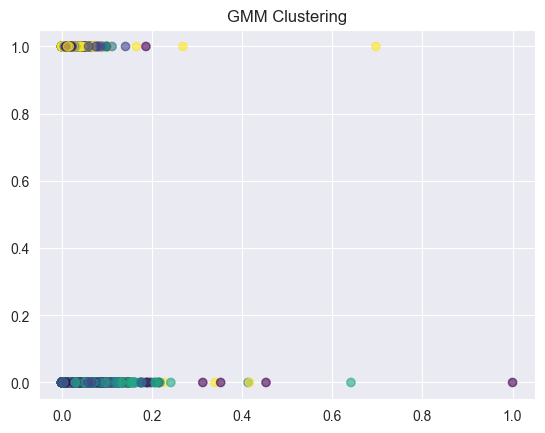

In [127]:
from sklearn.mixture import GaussianMixture

# Choose optimal K from elbow and silhouette score
optimal_k = 6  # Same as used in K-Means

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df_selected['Cluster'] = gmm.fit_predict(df_selected)

# Check cluster distribution
df_selected['Cluster'].value_counts()

df_selected['Cluster_Probs'] = gmm.predict_proba(df_selected).max(axis=1)
df_selected[['Cluster', 'Cluster_Probs']].head()

from sklearn.metrics import silhouette_score

silhouette_gmm = silhouette_score(df_selected, df_selected['Cluster'])
print(f"GMM Silhouette Score: {silhouette_gmm}")

import matplotlib.pyplot as plt

plt.scatter(df_selected.iloc[:, 0], df_selected.iloc[:, 1], c=df_selected['Cluster'], cmap='viridis', alpha=0.6)
plt.title("GMM Clustering")
plt.show()

DBSCAN

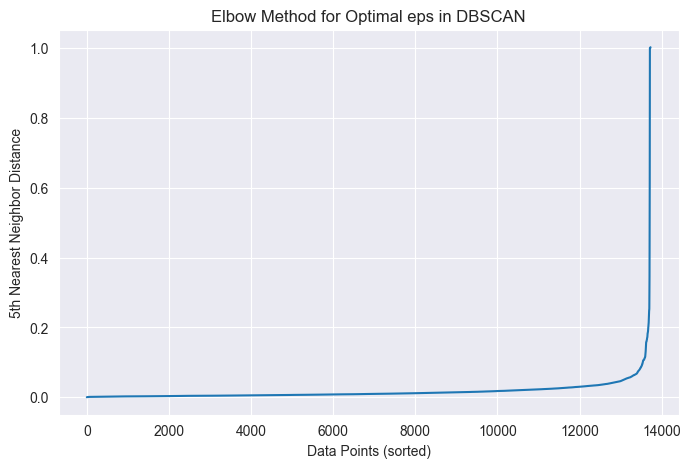

In [128]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fit Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_selected)
distances, indices = neighbors_fit.kneighbors(df_selected)

# Sort distances and plot the elbow curve
distances = np.sort(distances[:, 4])  # 5th nearest neighbor distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points (sorted)")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("Elbow Method for Optimal eps in DBSCAN")
plt.show()


In [129]:
from kneed import KneeLocator

# Automatically detect the elbow point
knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[knee.knee]  # Extract optimal eps

print(f"Optimal eps: {optimal_eps:.4f}")

Optimal eps: 1.0002


In [130]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate a wider range of eps values for testing
eps_values = np.linspace(optimal_eps * 0.2, optimal_eps * 1.5, 10)  # Test 10 values from 20% to 150% of `optimal_eps`

best_eps = None
best_score = -1  # Initialize lowest Silhouette Score

# Iterate over different eps values to find the best one
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(df_selected)

    # Exclude noise points (-1) from silhouette calculation
    valid_labels = labels[labels != -1]

    if len(set(valid_labels)) > 1:  # Ensure at least 2 clusters exist
        score = silhouette_score(df_selected.iloc[labels != -1], valid_labels)
        print(f"eps = {eps:.4f} --> Silhouette Score: {score:.4f}")

        # Update best_eps if the score is higher
        if score > best_score:
            best_score = score
            best_eps = eps
    else:
        print(f"eps = {eps:.4f} --> Only one cluster found, cannot compute Silhouette Score.")

# Display the best eps
print(f"\n✅ Best eps found: {best_eps:.4f} with Silhouette Score: {best_score:.4f}")

# Apply DBSCAN with the best eps
dbscan = DBSCAN(eps=best_eps, min_samples=10)
df_selected['Cluster'] = dbscan.fit_predict(df_selected)

print(f'optimal cluster numbers: {df_selected["Cluster"].value_counts()}')


eps = 0.2000 --> Silhouette Score: 0.8385
eps = 0.3445 --> Silhouette Score: 0.8415
eps = 0.4890 --> Silhouette Score: 0.8413
eps = 0.6335 --> Silhouette Score: 0.8411
eps = 0.7779 --> Silhouette Score: 0.8411
eps = 0.9224 --> Silhouette Score: 0.8410
eps = 1.0669 --> Silhouette Score: 0.5125
eps = 1.2113 --> Silhouette Score: 0.5125
eps = 1.3558 --> Silhouette Score: 0.5125
eps = 1.5003 --> Silhouette Score: 0.4161

✅ Best eps found: 0.3445 with Silhouette Score: 0.8415
optimal cluster numbers: 3     1543
51    1479
14    1025
54     825
5      745
      ... 
59      13
61      13
30      12
57      11
31      10
Name: Cluster, Length: 63, dtype: int64


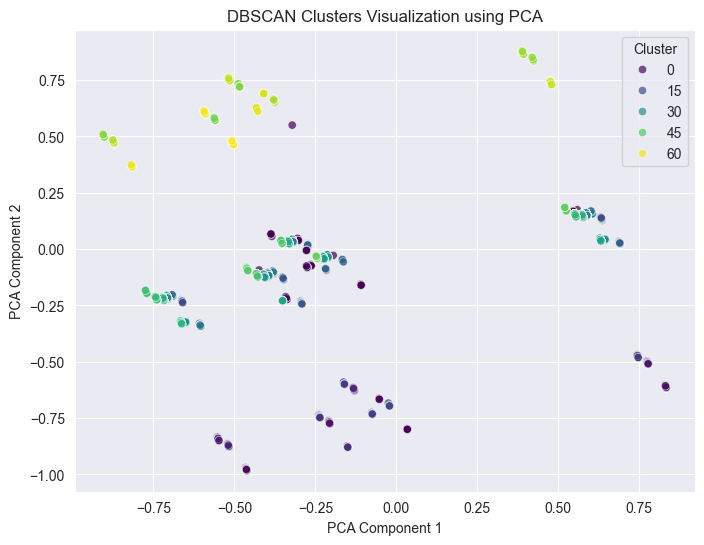

In [131]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected.drop(columns=['Cluster']))

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_selected['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clusters Visualization using PCA")
plt.legend(title="Cluster")
plt.show()


Segments products by popularity & brand influence.

In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features
df_numeric = df_selected[['product_like_count', 'brand_encoded']]


# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_selected['Cluster_Numeric'] = kmeans.fit_predict(df_numeric)

# Check clusters
print(df_selected['Cluster_Numeric'].value_counts())



0    10025
1     3291
3      407
2        4
Name: Cluster_Numeric, dtype: int64


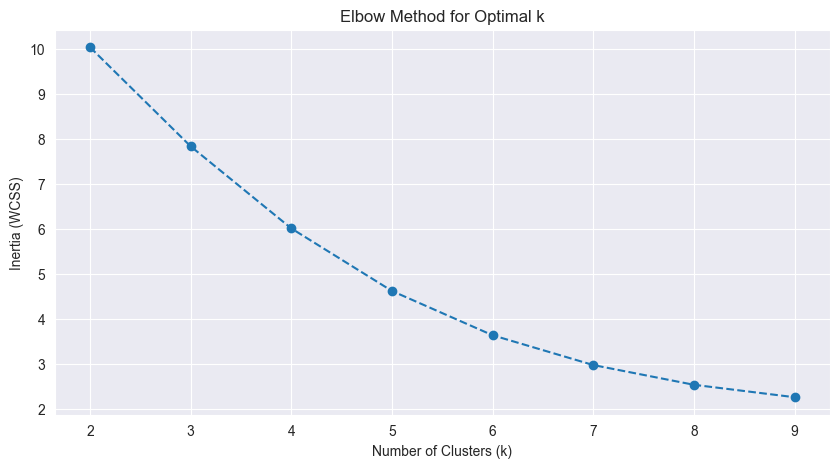

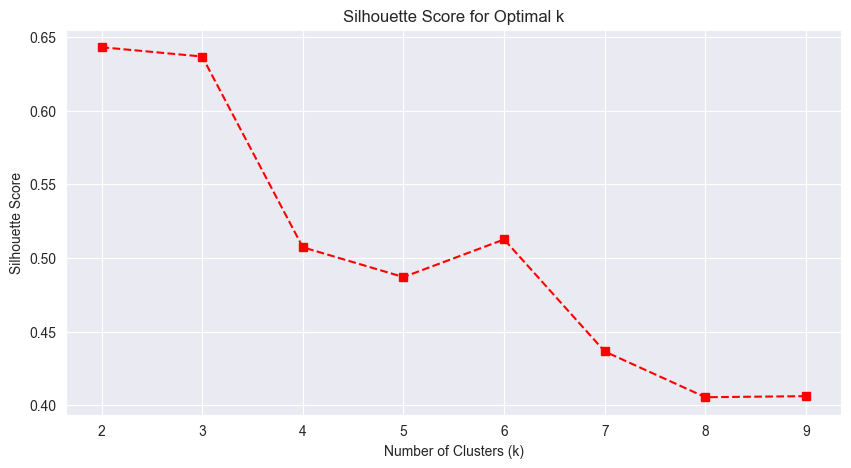

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_numeric)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_numeric, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


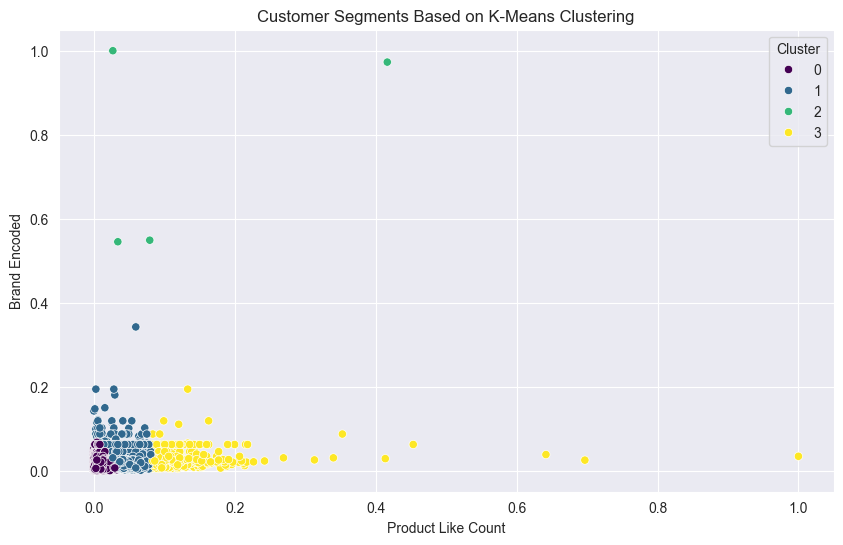

In [134]:
import seaborn as sns

# Apply optimized KMeans
optimal_k = 4  # Adjust based on the Elbow/Silhouette method
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_selected['Cluster_Optimized'] = kmeans_opt.fit_predict(df_numeric)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_numeric['product_like_count'],
                y=df_numeric['brand_encoded'],
                hue=df_selected['Cluster_Optimized'],
                palette='viridis')
plt.xlabel('Product Like Count')
plt.ylabel('Brand Encoded')
plt.title('Customer Segments Based on K-Means Clustering')
plt.legend(title="Cluster")
plt.show()


In [135]:
import pandas as pd

# Get the columns used for clustering
cluster_columns = df_numeric.columns

# Create DataFrame with correct columns
cluster_centers = pd.DataFrame(kmeans_opt.cluster_centers_, columns=cluster_columns)

# Assuming you still have the MinMaxScaler instance used for transformation
cluster_centers[['brand_encoded_original', 'product_like_count_original']] = scaler_minmax.inverse_transform(
    cluster_centers[['brand_encoded', 'product_like_count']]
)



print(cluster_centers)


   product_like_count  brand_encoded  brand_encoded_original  \
0            0.010430       0.014889              196.160388   
1            0.041345       0.027385              343.620367   
2            0.139164       0.766745             9068.850000   
3            0.122565       0.027915              349.882153   

   product_like_count_original  
0                     7.363346  
1                    29.189509  
2                    98.250000  
3                    86.530713  


In [136]:
print(df_selected['Cluster_Optimized'].value_counts())


0    10025
1     3291
3      407
2        4
Name: Cluster_Optimized, dtype: int64


In [137]:
# prompt: give the distinct value of the df_encoded[['brand_name','brand_encoded']]

brand_df = df_encoded[['brand_name', 'brand_encoded']].drop_duplicates()
brand_df['brand_encoded_original'] = (brand_df['brand_encoded'] * std_brand) + mean_brand


brand_df


,brand_name,brand_encoded,brand_encoded_original
0,Miu Miu,0.021165,243.565407
9,Dior,0.034379,246.582976
12,La Perla,0.006988,240.327807
19,Gucci,0.023216,244.033671
53,Agent Provocateur,0.007433,240.429219
...,...,...,...
894706,Camilla Skovgaard,0.004332,239.721113
896973,Circus by Sam Edelman,0.000386,238.819905
898239,Via Roma xv,0.009097,240.809258
899847,FRANCESCO MILANO,0.003796,239.598810


In [138]:
import numpy as np

# Function to find the 10 closest brands to a given encoded value
def find_top_10_closest_brands(encoded_value, brand_df):
    closest_indices = (np.abs(brand_df['brand_encoded'] - encoded_value)).nsmallest(10).index
    return brand_df.loc[closest_indices, 'brand_name'].tolist()  # Return a list of top 10 brands

# Apply function to find the closest 10 brands for each cluster centroid
cluster_centers['top_10_brands'] = cluster_centers['brand_encoded'].apply(lambda x: find_top_10_closest_brands(x, brand_df))

# Print results
for i, row in cluster_centers.iterrows():
    print(f"Cluster {i} Centroid (Encoded: {row['brand_encoded']}):")
    print("Top 10 Closest Brands:", ", ".join(row['top_10_brands']))
    print("-" * 60)



Cluster 0 Centroid (Encoded: 0.014889385919139967):
Top 10 Closest Brands: Burberry, Pleats Please, Paraboot, Dries Van Noten, Aquazzura, Eyevan, DUKE + DEXTER, Marc Le Bihan, Martine Rose, Drake's
------------------------------------------------------------
Cluster 1 Centroid (Encoded: 0.027384882429392306):
Top 10 Closest Brands: BRIAN DALES, Simone Rocha, Maison Martin Margiela, MOORER, Tove, Zegna, Mach & Mach, Damiani, Visvim, Hereu
------------------------------------------------------------
Cluster 2 Centroid (Encoded: 0.7667453319831711):
Top 10 Closest Brands: Patek Philippe, Jordan x Dior, Hublot, Audemars Piguet, Panerai, Chopard, Frederique Constant, Chanel x Pharrell Williams, Tudor, Kired
------------------------------------------------------------
Cluster 3 Centroid (Encoded: 0.02791549507336149):
Top 10 Closest Brands: Simone Rocha, Tove, Mach & Mach, Hereu, Loewe, BRIAN DALES, 11 by Boris Bidjan Saberi, Maison Martin Margiela, MOORER, Elie Saab
------------------------

The clustering results reveal key insights into the segmentation of second-hand luxury products. The majority of items (10,025) fall into **Cluster 0**, indicating a large market for widely available and affordable luxury brands with moderate demand. **Cluster 1**, comprising 3,291 items, represents mid-range popularity brands that still hold value but do not dominate the second-hand market. In contrast, **Cluster 3** (407 items) appears to consist of highly desirable products with higher engagement, while **Cluster 2** (only 4 items) likely contains ultra-exclusive, rare luxury watch brands such as ** Patek Philippe, Hublot or Panerai**, suggesting that certain high-end brands are far less available in the resale market.

The relationship between **brand influence and popularity** further highlights that products with high like counts do not necessarily belong to influential brands. While **Cluster 0 brands** have lower influence and widespread availability, **Cluster 3 brands** exhibit a balance between desirability and exclusivity. Meanwhile, **Cluster 2 brands**, though extremely rare, likely command **premium pricing and a niche buyer segment**.

From a business perspective, second-hand luxury platforms should focus on **marketing heavily to Cluster 0 and 1** to drive high-volume sales while developing **premium, auction-based strategies** for Cluster 2. Cluster 3 presents opportunities for **curated collections and designer brand** to boost engagement. Further analysis into **pricing trends and brand-level patterns** could refine strategies for maximizing revenue from each segment.

Material & Color Cluster (Categorical Features)

In [139]:
# Select categorical features
df_categorical = df_selected[['product_material_encoded', 'product_color_encoded']]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_selected['Cluster_KMeans'] = kmeans.fit_predict(df_categorical)

# Check cluster distribution
print(df_selected['Cluster_KMeans'].value_counts())


2    5186
1    4621
3    2184
0    1736
Name: Cluster_KMeans, dtype: int64


In [140]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_categorical, df_selected['Cluster_KMeans'])
print(f"K-Means Silhouette Score: {score}")


K-Means Silhouette Score: 0.7293376680228323


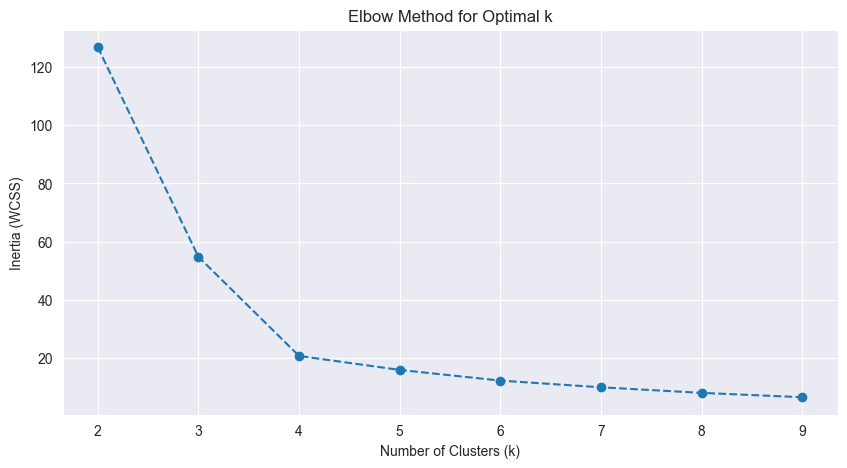

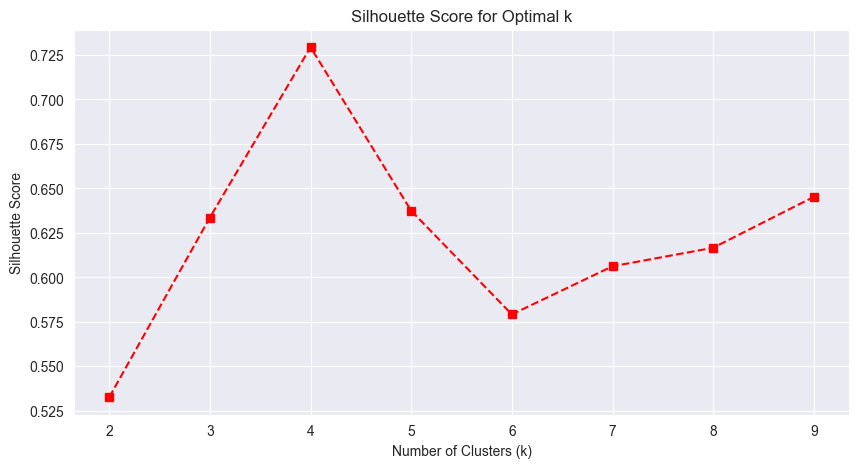

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_categorical)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_categorical, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


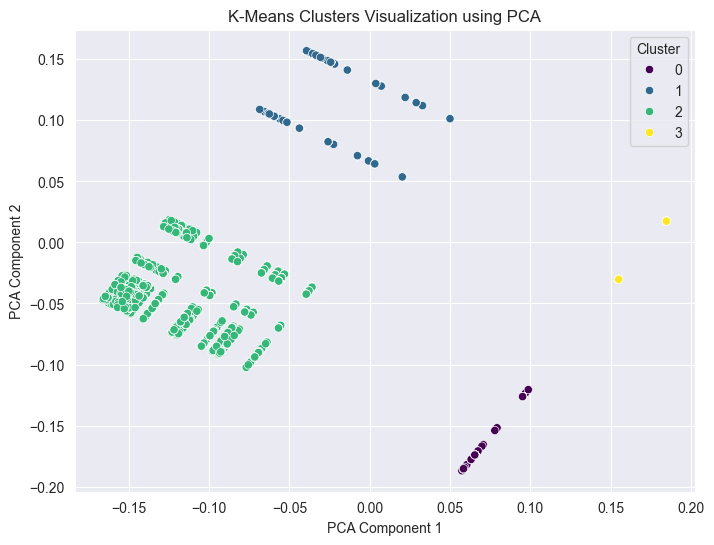

In [142]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_categorical)

# Add PCA components to DataFrame
df_selected['PCA1'] = df_pca[:, 0]
df_selected['PCA2'] = df_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=df_selected, palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters Visualization using PCA")
plt.legend(title="Cluster")
plt.show()


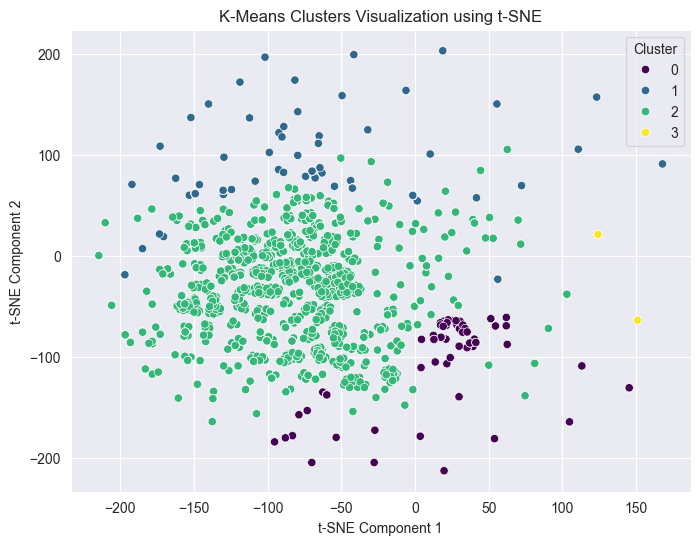

In [143]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure perplexity is less than the number of samples
n_samples = df_categorical.shape[0]
perplexity_value = min(30, n_samples - 1)  # Adjust dynamically

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
df_tsne = tsne.fit_transform(df_categorical)

# Add t-SNE components to DataFrame
df_selected['TSNE1'] = df_tsne[:, 0]
df_selected['TSNE2'] = df_tsne[:, 1]

# Scatter plot of clusters using t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster_KMeans', data=df_selected, palette='viridis')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("K-Means Clusters Visualization using t-SNE")
plt.legend(title="Cluster")
plt.show()


In [144]:
df_results = df_selected.groupby('Cluster_KMeans').agg(lambda x: x.value_counts().index[0])
df_results

,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,...,product_material_encoded,product_color_encoded,Cluster,Cluster_Probs,Cluster_Numeric,Cluster_Optimized,PCA1,PCA2,TSNE1,TSNE2
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,0.004249,0,0,0,0,0,0,0,0,0,...,0.071553,0.267595,51,1.0,0,0,0.095177,-0.126259,29.916672,-139.326523
1,0.002833,0,0,0,0,0,0,0,0,0,...,0.240843,0.076035,14,1.0,0,0,0.022083,0.118714,55.637856,150.318344
2,0.002833,0,0,0,0,0,0,0,0,0,...,0.074751,0.108916,3,1.0,0,0,-0.054949,-0.028982,90.588699,-71.703644
3,0.005666,0,0,0,0,0,0,0,0,0,...,0.240843,0.267595,51,1.0,0,0,0.184681,0.017436,124.266693,21.253769


In [145]:
df_results_mean = df_selected.groupby('Cluster_KMeans').mean()
df_results_mean

,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,...,product_material_encoded,product_color_encoded,Cluster,Cluster_Probs,Cluster_Numeric,Cluster_Optimized,PCA1,PCA2,TSNE1,TSNE2
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,0.022236,0.144009,0.095622,0.049539,0.324885,0.290323,0.137673,0.071429,0.109447,0.267281,...,0.038467,0.267595,26.774770,0.999739,0.356567,0.356567,0.077685,-0.154342,35.867126,-143.193268
1,0.020346,0.263579,0.129193,0.030729,0.231768,0.318979,0.008223,0.061459,0.116858,0.236096,...,0.213306,0.063032,28.290413,0.999990,0.306644,0.306644,-0.003513,0.102215,-1.040917,102.323921
2,0.020669,0.165831,0.079252,0.061126,0.391053,0.198419,0.176437,0.089664,0.095064,0.255496,...,0.041719,0.059342,22.506170,0.999480,0.317586,0.317586,-0.097363,-0.041478,-48.586468,-35.346321
3,0.023567,0.186355,0.204212,0.025641,0.113095,0.428114,0.013278,0.068681,0.124084,0.243590,...,0.226078,0.267595,35.591575,0.999991,0.383242,0.383242,0.176875,0.004903,131.294434,-1.033291


In [146]:
import numpy as np
# Function to find closest match
def find_closest_match(encoded_value, reference_df, column_name):
    closest_index = (np.abs(reference_df[column_name] - encoded_value)).idxmin()
    return reference_df.loc[closest_index, column_name.replace("_encoded", "")]


# Apply function to find closest product material and color for each cluster
df_results['Closest_Product_Material'] = df_results['product_material_encoded'].apply(
    lambda x: find_closest_match(x, df_color_material, 'product_material_encoded'))

df_results['Closest_Product_Color'] = df_results['product_color_encoded'].apply(
    lambda x: find_closest_match(x, df_color_material, 'product_color_encoded'))

# Display results
print(df_results[['Closest_Product_Material', 'Closest_Product_Color']])

               Closest_Product_Material Closest_Product_Color
Cluster_KMeans                                               
0                             Polyester                 Black
1                               Leather                 White
2                                  Silk                  Blue
3                               Leather                 Black


In [147]:
import numpy as np



df_results_mean['Closest_Product_Color'] = df_results_mean['product_color_encoded'].apply(
    lambda x: find_closest_match(x, df_color_material, 'product_color_encoded'))

# Display results
print(df_results_mean[[ 'Closest_Product_Color']])

               Closest_Product_Color
Cluster_KMeans                      
0                              Black
1                               Grey
2                               Grey
3                              Black


The clustering analysis of material and color preferences in second-hand luxury sales reveals distinct consumer trends. Cluster 0 primarily features polyester and black-colored items, indicating a preference for practical and versatile luxury fashion.  The largest group, Cluster 2, favors silk and blue, highlighting a demand for sophisticated, high-fashion pieces like scarves and dresses. Meanwhile, Cluster 1&3 ,  is associated with leather and black, likely representing luxury bags, shoes, and accessories that hold their value over time. Across clusters, leather remains dominant in high-end segments, while black is the most preferred color, emphasizing its timeless appeal in luxury shoes resale. This segmentation provides valuable insights for tailoring marketing strategies  in the second-hand luxury market.

Cluster Product Type & Season (Binary Features)

In [148]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering


# Select binary one-hot encoded features
df_binary = df_selected[[col for col in df_selected.columns if col.startswith('product_category') or
                         col.startswith('product_season') or col.startswith('product_condition')]]

# Compute Hamming distance matrix
distance_matrix = pdist(df_binary, metric='hamming')
distance_matrix = squareform(distance_matrix)

# Apply Agglomerative Clustering with precomputed distances
agglo = AgglomerativeClustering(n_clusters=4, linkage='average', metric="precomputed")
df_selected['Cluster_Agglo'] = agglo.fit_predict(distance_matrix)

# Print cluster distribution
print(df_selected['Cluster_Agglo'].value_counts())


0    6271
3    3452
1    2394
2    1610
Name: Cluster_Agglo, dtype: int64


In [149]:
from sklearn.metrics import silhouette_score

# Compute silhouette score (only works with >1 cluster)
if len(set(df_selected['Cluster_Agglo'])) > 1:
    score = silhouette_score(distance_matrix, df_selected['Cluster_Agglo'], metric='precomputed')
    print(f"Agglomerative Clustering Silhouette Score: {score}")
else:
    print("Only one cluster found. Silhouette Score cannot be computed.")


Agglomerative Clustering Silhouette Score: 0.5131266103683155


In [150]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Different linkage methods to try (excluding 'ward' as it requires Euclidean distance)
linkage_methods = ['complete', 'average', 'single']
best_score = -1
best_linkage = None

for linkage in linkage_methods:
    print(f"Testing linkage: {linkage}")

    # Apply Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric="precomputed")
    cluster_labels = agglo.fit_predict(distance_matrix)

    # Compute silhouette score only if there is more than 1 cluster
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
        print(f"Linkage: {linkage}, Silhouette Score: {score}")

        if score > best_score:
            best_score = score
            best_linkage = linkage

# Print the best linkage
print(f"Best Linkage: {best_linkage} with Silhouette Score: {best_score}")


Testing linkage: complete
Linkage: complete, Silhouette Score: 0.2996746505913359
Testing linkage: average
Linkage: average, Silhouette Score: 0.4378954338119246
Testing linkage: single
Linkage: single, Silhouette Score: -0.07403319988918519
Best Linkage: average with Silhouette Score: 0.4378954338119246


In [151]:
best_n_clusters = None
best_score = -1

for n_clusters in range(2, 10):  # Trying different cluster numbers
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_linkage, metric="precomputed")
    cluster_labels = agglo.fit_predict(distance_matrix)

    if len(set(cluster_labels)) > 1:  # Avoid single cluster issue
        score = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
        print(f"n_clusters: {n_clusters}, Silhouette Score: {score}")

        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

print(f"Optimal n_clusters: {best_n_clusters} with Silhouette Score: {best_score}")


n_clusters: 2, Silhouette Score: 0.2795675928947555
n_clusters: 3, Silhouette Score: 0.44428630570545363
n_clusters: 4, Silhouette Score: 0.5131266103683155
n_clusters: 5, Silhouette Score: 0.4378954338119246
n_clusters: 6, Silhouette Score: 0.39703042954359025
n_clusters: 7, Silhouette Score: 0.3881127644531115
n_clusters: 8, Silhouette Score: 0.3402583219141953
n_clusters: 9, Silhouette Score: 0.34238972725767935
Optimal n_clusters: 4 with Silhouette Score: 0.5131266103683155


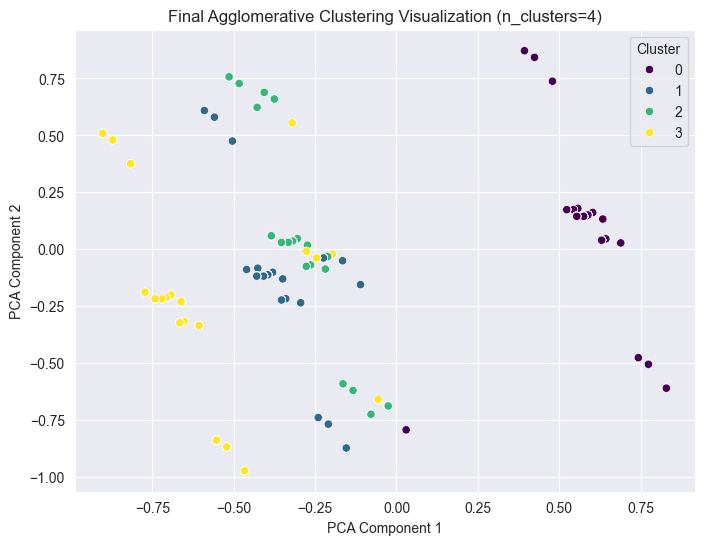

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_binary)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_selected['Cluster_Agglo'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Final Agglomerative Clustering Visualization (n_clusters=4)")
plt.legend(title="Cluster")
plt.show()


In [153]:
print(df_selected['Cluster_Agglo'].value_counts())


0    6271
3    3452
1    2394
2    1610
Name: Cluster_Agglo, dtype: int64


In [154]:
df_season= df_selected.groupby('Cluster_Agglo').mean()
df_season

,product_like_count,product_category_Men Clothing,product_category_Men Shoes,product_category_Women Accessories,product_category_Women Clothing,product_category_Women Shoes,product_season_Autumn / Winter,product_season_Spring / Summer,product_condition_Good condition,product_condition_Never worn,...,product_color_encoded,Cluster,Cluster_Probs,Cluster_Numeric,Cluster_Optimized,Cluster_KMeans,PCA1,PCA2,TSNE1,TSNE2
Cluster_Agglo,,,,,,,,,,,,,,,,,,,,,
0,0.020340,0.211450,0.103173,0.036836,0.319566,0.271408,0.105884,0.062829,0.00000,0.000000,...,0.118715,24.950885,0.999604,0.311912,0.311912,1.574868,-0.002162,-0.000937,6.066799,1.692682
1,0.022765,0.237260,0.134503,0.041353,0.286132,0.254804,0.076441,0.093567,0.00000,0.000000,...,0.119330,25.568087,1.000000,0.362991,0.362991,1.571846,-0.000366,0.000783,5.997421,3.242559
2,0.022136,0.164596,0.136025,0.053416,0.163975,0.404348,0.061491,0.062112,0.92795,0.000000,...,0.124915,34.190683,0.999918,0.355901,0.355901,1.559627,0.010660,0.007923,12.418421,11.229500
3,0.021318,0.166860,0.125145,0.053592,0.277231,0.283604,0.079664,0.088355,0.00000,0.988413,...,0.120724,28.660487,0.999827,0.325029,0.325029,1.562862,-0.000791,-0.002536,5.746376,0.647628


cluster 1: women clothing , with all season dominate, also strong prefer the never worn with tag
cluster 0: women clothing, with all season , prefer very good condition,
cluster 2: women shoes, all season, good condition, never worn


Results align with the previous cluster
